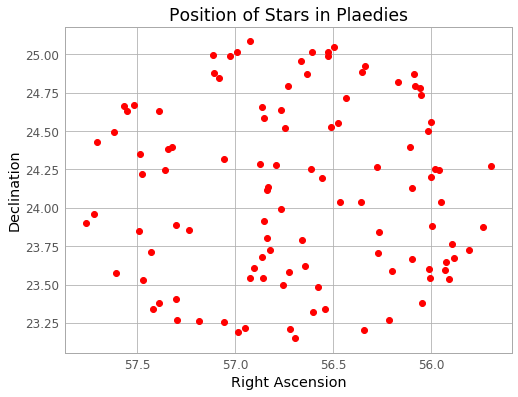

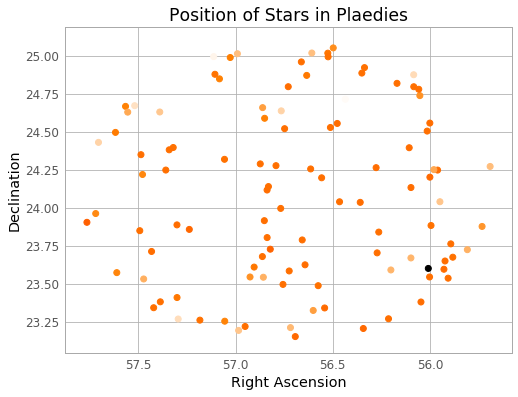

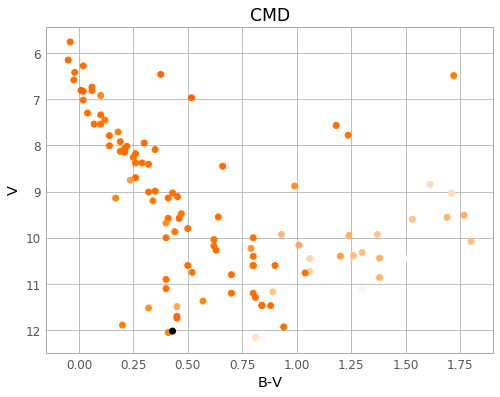

        source_id         ra  ra_error        dec  dec_error   parallax  \
0    6.510000e+16  55.808399  0.399256  23.723451   0.181592   1.881800   
1    6.520000e+16  56.613754  0.367165  24.254813   0.167186   7.743384   
2    6.520000e+16  56.557353  0.275844  24.196562   0.171884   7.557063   
3    6.510000e+16  56.046827  0.404932  23.379132   0.188075   7.998248   
4    6.520000e+16  56.851815  0.249860  23.914490   0.219506   7.648681   
5    6.500000e+16  56.692788  0.524385  23.151440   0.226199   9.835324   
6    6.670000e+16  56.791982  0.386344  24.276466   0.145985   7.146140   
7    6.650000e+16  57.300869  0.299915  23.886600   0.134273   7.836103   
8    6.670000e+16  56.837754  0.383294  24.116080   0.215927   7.876296   
9    6.670000e+16  57.056571  0.413688  24.318224   0.260232   7.066701   
10   6.530000e+16  56.107253  0.319326  24.394511   0.198991   8.138967   
11   6.530000e+16  56.277332  0.426831  24.263322   0.292842   8.144556   
12   6.660000e+16  57.485

In [1]:
#import libraries
import csv
import astropy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy import units as u
from astropy.coordinates import SkyCoord

#convert ra and dec
gd = pd.read_csv ('./data.csv', header=0)
c = SkyCoord(gd.ra*u.degree, gd.dec*u.degree, equinox='J2015.0')
gd['radecstring'] = c.to_string('hmsdms')
gd['radecstring']
gd['radecstring'].to_csv('./coordinates.tab', sep='\t', header=False, index=False)

#plot position of stars
plt.plot(gd['ra'],gd.dec,'ro')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.gca().invert_xaxis()
plt.title('Position of Stars in Plaedies')
plt.show()

#plot color coded postion of stars
gd['dist']=[1./a for a in 0.001*gd['parallax']]
plt.scatter(gd.ra,gd.dec,c= gd.dist)#'ro'
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.gca().invert_xaxis()
plt.title('Position of Stars in Plaedies')
plt.show()

#print color coded V vs. BV diagram
bv = pd.read_csv ('./SIMBADpleiades.csv', header=0)
plt.scatter(bv.BV,bv.V,c=gd.dist)#'ro')
plt.xlabel('B-V')
plt.ylabel('V')
plt.gca().invert_yaxis()
plt.title('CMD')
plt.show()

#print data table
gd2 = pd.read_csv ('./data2.csv', header=0)
print(gd2)